In [1]:
!unzip train_SOaYf6m.zip

Archive:  train_SOaYf6m.zip
   creating: images/
  inflating: images/0.jpg            
  inflating: images/1.jpg            
  inflating: images/10.jpg           
  inflating: images/100.jpg          
  inflating: images/1000.jpg         
  inflating: images/1001.jpg         
  inflating: images/1002.jpg         
  inflating: images/1003.jpg         
  inflating: images/1004.jpg         
  inflating: images/1005.jpg         
  inflating: images/1006.jpg         
  inflating: images/1007.jpg         
  inflating: images/1008.jpg         
  inflating: images/1009.jpg         
  inflating: images/101.jpg          
  inflating: images/1010.jpg         
  inflating: images/1011.jpg         
  inflating: images/1012.jpg         
  inflating: images/1013.jpg         
  inflating: images/1014.jpg         
  inflating: images/1015.jpg         
  inflating: images/1016.jpg         
  inflating: images/1017.jpg         
  inflating: images/1018.jpg         
  inflating: images/1019.jpg         
 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [3]:
df = pd.read_csv("train.csv")
df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [4]:
print(type(df["emergency_or_not"][0]))
df["emergency_or_not"] = df["emergency_or_not"].astype("str")
type(df["emergency_or_not"][0])

<class 'numpy.int64'>


str

(224, 224, 3)


(-0.5, 223.5, 223.5, -0.5)

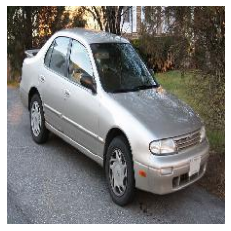

In [5]:
img = cv2.imread("images/1033.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
plt.axis("off")

In [19]:
base_model = tf.keras.applications.ResNet101V2(include_top = False, input_shape = (122,122,3))

output_1 = base_model.layers[-1].output
output_2 = tf.keras.layers.Flatten()(output_1)

base_model = tf.keras.models.Model(base_model.input, output_2)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Dense(1024,activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(2,activation="sigmoid"))
  
opti = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')
model.compile(optimizer=opti,loss="categorical_crossentropy",metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 32768)             42626560  
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              33555456  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [21]:
train_datagen = ImageDataGenerator(rescale=1.0/255,shear_range=0.2,rotation_range=0.4,height_shift_range=0.2,zoom_range=0.2,
                                   validation_split=0.25)

In [22]:
TARGET_SIZE = 122
BATCH_SIZE = 128
EPOCHS = 15

In [23]:
training_data = train_datagen.flow_from_dataframe(dataframe = df,
                                            directory = "images/",
                                            x_col="image_names",
                                            y_col="emergency_or_not",
                                            target_size=(TARGET_SIZE,TARGET_SIZE),
                                            batch_size=BATCH_SIZE,
                                            shuffle= True,
                                            subset="training",
                                            class_mode = 'categorical')

Found 1235 validated image filenames belonging to 2 classes.


In [24]:
validate_data = train_datagen.flow_from_dataframe(dataframe = df,
                                            directory = "images/",
                                            x_col="image_names",
                                            y_col="emergency_or_not",
                                            target_size=(TARGET_SIZE,TARGET_SIZE),
                                            batch_size=BATCH_SIZE,
                                            shuffle= True,
                                            subset="validation",
                                            class_mode = 'categorical')

Found 411 validated image filenames belonging to 2 classes.


In [25]:
batch_x , batch_y = training_data.next()

In [26]:
batch_x.shape

(128, 122, 122, 3)

In [27]:
batch_y.shape

(128, 2)

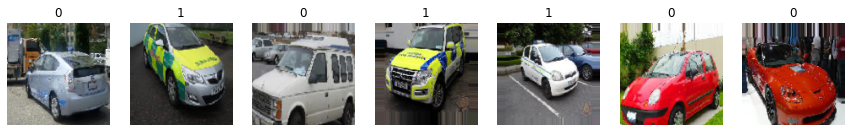

In [28]:
fig, axs = plt.subplots(1,7, figsize=(15,15)) # subplots will be in 2 rows and 5 columns
axs = axs.flatten() # flatten the axis into one single dimension
for img,yhat,ax in zip(batch_x[:7],batch_y[:7],axs):  # which is number of subplots we want to print
    ax.imshow(img, cmap="gray")
    labl = np.argmax(yhat)
    ax.title.set_text(labl)
    ax.axis("off")
plt.show() 

In [30]:
history = model.fit_generator(training_data,
                              epochs=EPOCHS,
                              steps_per_epoch=training_data.samples//BATCH_SIZE,
                              validation_data=validate_data,
                              validation_steps=validate_data.samples//BATCH_SIZE)

Epoch 1/15
9/9 [==============================] - 7s 783ms/step - loss: 0.1409 - accuracy: 0.9440 - val_loss: 0.2916 - val_accuracy: 0.9089
Epoch 2/15
9/9 [==============================] - 7s 785ms/step - loss: 0.1167 - accuracy: 0.9494 - val_loss: 0.2430 - val_accuracy: 0.9010
Epoch 3/15
9/9 [==============================] - 7s 794ms/step - loss: 0.1065 - accuracy: 0.9557 - val_loss: 0.3256 - val_accuracy: 0.8802
Epoch 4/15
9/9 [==============================] - 7s 790ms/step - loss: 0.0886 - accuracy: 0.9612 - val_loss: 0.3268 - val_accuracy: 0.8880
Epoch 5/15
9/9 [==============================] - 7s 792ms/step - loss: 0.1112 - accuracy: 0.9592 - val_loss: 0.3504 - val_accuracy: 0.9062
Epoch 6/15
9/9 [==============================] - 7s 788ms/step - loss: 0.1320 - accuracy: 0.9557 - val_loss: 0.2883 - val_accuracy: 0.9062
Epoch 7/15
9/9 [==============================] - 7s 796ms/step - loss: 0.1084 - accuracy: 0.9539 - val_loss: 0.3688 - val_accuracy: 0.9010
Epoch 8/15
9/9 [====

In [31]:
model.save("model_03.h5")